In [ ]:
pip install --upgrade git+https://github.com/mbasil932/CV-assignment2-2022.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/mbasil932/CV-assignment2-2022.git to /tmp/pip-req-build-g143r_ek
  Running command git clone -q https://github.com/mbasil932/CV-assignment2-2022.git /tmp/pip-req-build-g143r_ek
ERROR: File "setup.py" not found for legacy project git+https://github.com/mbasil932/CV-assignment2-2022.git.


In [ ]:
!pip3 install tensorflow==2.4.1 
!pip3 install keras==2.4.3
!pip3 install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 394.3 MB 9.7 kB/s 
     |████████████████████████████████| 2.9 MB 41.0 MB/s 
     |████████████████████████████████| 3.8 MB 45.1 MB/s 
     |████████████████████████████████| 462 kB 44.8 MB/s 
     |████████████████████████████████| 132 kB 54.2 MB/s 
     |████████████████████████████████| 14.8 MB 39.1 MB/s 
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4849 sha256=de9b78bca1a28291dcb2131773598c4f13c11ad2c0693c77c00b30985e3b7e8d
  Stored in directory: /root/.cache/pip/wheels/3f/e3/ec/8a8336ff196023622fbcb36de0c5a5c218cbb24111d1d4c7f2
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68729 sha256=514ee74ad95cf529c93e667b8483f4c18215103f9cf2b1debc553fe40a7ed158
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built ter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/content/dataset1'
!ls

Mounted at /content/gdrive
/content/gdrive/MyDrive/content/dataset1
annotations_prepped_test   images_prepped_test
annotations_prepped_train  images_prepped_train


In [ ]:
# Defining Segmentation Model and Downloading Predefined Weights
!pip install keras-segmentation
!pip install segmentation-models
from tensorflow import keras
from keras_segmentation.models.unet import mobilenet_unet



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.3 MB 44.2 MB/s 
     |████████████████████████████████| 753 kB 61.9 MB/s 
  Created wheel for keras-segmentation: filename=keras_segmentation-0.3.0-py3-none-any.whl size=29071 sha256=0095b1f5513fb5d19845fc8a5ee873e8ed9e5f4c5e427fc0b3a94425637a788a
  Stored in directory: /root/.cache/pip/wheels/68/dc/b3/596a3e2461ba16e935ef31661c26e823f841cfb577cec4c47a
Successfully built keras-segmentation
  Attempting uninstall: imageio
    Found existing installation: imageio 2.9.0
    Uninstalling imageio-2.9.0:
      Successfully uninstalled imageio-2.9.0
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.4.0
    Uninstalling imgaug-0.4.0:
      Successfully uninstalled imgaug-0.4.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 6.7 MB/s 


In [ ]:
model = mobilenet_unet(n_classes=51 ,  input_height=224, input_width=224)

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
# Model Summary 

model.summary();

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 226, 226, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1 (Conv2D)                 (None, 112, 112, 32  864         ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
# Model Training

model.train(
    train_images =  "images_prepped_train/",
    train_annotations = "annotations_prepped_train/",
    checkpoints_path = "/tmp/mobilenet_unet_1" ,
    input_width=608,
    n_classes=51,
    do_augment=True,
    val_images="images_prepped_train/",
    val_annotations="annotations_prepped_train/",
    augmentation_name="aug_all",
    epochs=5,
    validate=True,
    batch_size=2,
    val_batch_size=2,
    steps_per_epoch=25,
    val_steps_per_epoch=25,
)

Verifying training dataset


100%|██████████| 367/367 [00:06<00:00, 57.54it/s]


Dataset verified! 
Verifying validation dataset


100%|██████████| 367/367 [00:06<00:00, 53.31it/s]


Dataset verified! 
Epoch 1/5
25/25 [==============================] - 56s 2s/step - loss: 2.9536 - accuracy: 0.3562 - val_loss: 2.1018 - val_accuracy: 0.5517
Epoch 2/5
25/25 [==============================] - 50s 2s/step - loss: 2.8181 - accuracy: 0.3906 - val_loss: 2.0252 - val_accuracy: 0.5774
Epoch 3/5
25/25 [==============================] - 50s 2s/step - loss: 2.7725 - accuracy: 0.4063 - val_loss: 1.9948 - val_accuracy: 0.5803
Epoch 4/5
25/25 [==============================] - 50s 2s/step - loss: 2.7710 - accuracy: 0.4122 - val_loss: 1.9098 - val_accuracy: 0.6040
Epoch 5/5
25/25 [==============================] - 47s 2s/step - loss: 2.5774 - accuracy: 0.4615 - val_loss: 1.9267 - val_accuracy: 0.5986


In [ ]:
# Model Prediction

out = model.predict_segmentation(
    inp="images_prepped_test/0016E5_07965.png",
    out_fname="/tmp/out.png"
)

1/1 [==============================] - 1s 655ms/step


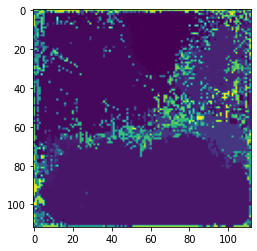

In [ ]:

import matplotlib.pyplot as plt
plt.imshow(out)

In [ ]:
print(model.evaluate_segmentation( inp_images_dir="images_prepped_test/"  , annotations_dir="annotations_prepped_test/" ) )


0it [00:00, ?it/s]

1/1 [==============================] - 0s 192ms/step


1it [00:00,  1.36it/s]

1/1 [==============================] - 0s 267ms/step


2it [00:01,  1.01it/s]

1/1 [==============================] - 0s 198ms/step


3it [00:02,  1.25it/s]

1/1 [==============================] - 0s 183ms/step


4it [00:03,  1.41it/s]

1/1 [==============================] - 0s 185ms/step


5it [00:03,  1.53it/s]

1/1 [==============================] - 0s 183ms/step


6it [00:04,  1.63it/s]

1/1 [==============================] - 0s 211ms/step


7it [00:04,  1.74it/s]

1/1 [==============================] - 0s 198ms/step


8it [00:05,  1.86it/s]

1/1 [==============================] - 0s 176ms/step


9it [00:05,  1.81it/s]

1/1 [==============================] - 0s 183ms/step


10it [00:06,  1.79it/s]

1/1 [==============================] - 0s 198ms/step


11it [00:06,  1.90it/s]

1/1 [==============================] - 0s 194ms/step


12it [00:07,  2.01it/s]

1/1 [==============================] - 0s 197ms/step


13it [00:07,  1.86it/s]

1/1 [==============================] - 0s 206ms/step


14it [00:08,  1.94it/s]

1/1 [==============================] - 0s 177ms/step


15it [00:08,  2.05it/s]

1/1 [==============================] - 0s 174ms/step


16it [00:09,  1.97it/s]

1/1 [==============================] - 0s 191ms/step


17it [00:09,  2.05it/s]

1/1 [==============================] - 0s 197ms/step


18it [00:10,  1.91it/s]

1/1 [==============================] - 0s 183ms/step


19it [00:10,  1.84it/s]

1/1 [==============================] - 0s 177ms/step


20it [00:11,  1.96it/s]

1/1 [==============================] - 0s 176ms/step


21it [00:11,  1.91it/s]

1/1 [==============================] - 0s 180ms/step


22it [00:12,  2.03it/s]

1/1 [==============================] - 0s 205ms/step


23it [00:12,  2.11it/s]

1/1 [==============================] - 0s 198ms/step


24it [00:13,  1.98it/s]

1/1 [==============================] - 0s 185ms/step


25it [00:13,  1.90it/s]

1/1 [==============================] - 0s 173ms/step


26it [00:14,  1.89it/s]

1/1 [==============================] - 0s 175ms/step


27it [00:14,  2.03it/s]

1/1 [==============================] - 0s 180ms/step


28it [00:15,  1.97it/s]

1/1 [==============================] - 0s 197ms/step


29it [00:15,  2.04it/s]

1/1 [==============================] - 0s 199ms/step


30it [00:16,  1.95it/s]

1/1 [==============================] - 0s 190ms/step


31it [00:16,  1.88it/s]

1/1 [==============================] - 0s 196ms/step


32it [00:17,  1.83it/s]

1/1 [==============================] - 0s 199ms/step


33it [00:17,  1.91it/s]

1/1 [==============================] - 0s 199ms/step


34it [00:18,  1.86it/s]

1/1 [==============================] - 0s 189ms/step


35it [00:18,  1.96it/s]

1/1 [==============================] - 0s 185ms/step


36it [00:19,  2.06it/s]

1/1 [==============================] - 0s 201ms/step


37it [00:19,  1.96it/s]

1/1 [==============================] - 0s 196ms/step


38it [00:20,  1.89it/s]

1/1 [==============================] - 0s 186ms/step


39it [00:21,  1.88it/s]

1/1 [==============================] - 0s 183ms/step


40it [00:21,  1.87it/s]

1/1 [==============================] - 0s 198ms/step


41it [00:22,  1.84it/s]

1/1 [==============================] - 0s 183ms/step


42it [00:22,  1.83it/s]

1/1 [==============================] - 0s 184ms/step


43it [00:23,  1.98it/s]

1/1 [==============================] - 0s 181ms/step


44it [00:23,  1.92it/s]

1/1 [==============================] - 0s 182ms/step


45it [00:24,  1.90it/s]

1/1 [==============================] - 0s 186ms/step


46it [00:24,  2.01it/s]

1/1 [==============================] - 0s 180ms/step


47it [00:25,  1.91it/s]

1/1 [==============================] - 0s 181ms/step


48it [00:25,  1.99it/s]

1/1 [==============================] - 0s 198ms/step


49it [00:26,  2.08it/s]

1/1 [==============================] - 0s 199ms/step


50it [00:26,  1.97it/s]

1/1 [==============================] - 0s 184ms/step


51it [00:27,  1.83it/s]

1/1 [==============================] - 0s 178ms/step


52it [00:27,  1.82it/s]

1/1 [==============================] - 0s 197ms/step


53it [00:28,  1.82it/s]

1/1 [==============================] - 0s 187ms/step


54it [00:28,  1.95it/s]

1/1 [==============================] - 0s 187ms/step


55it [00:29,  1.91it/s]

1/1 [==============================] - 0s 178ms/step


56it [00:29,  2.04it/s]

1/1 [==============================] - 0s 182ms/step


57it [00:30,  1.91it/s]

1/1 [==============================] - 0s 179ms/step


58it [00:30,  2.02it/s]

1/1 [==============================] - 0s 200ms/step


59it [00:31,  1.92it/s]

1/1 [==============================] - 0s 194ms/step


60it [00:31,  2.02it/s]

1/1 [==============================] - 0s 206ms/step


61it [00:32,  2.08it/s]

1/1 [==============================] - 0s 192ms/step


62it [00:32,  1.98it/s]

1/1 [==============================] - 0s 201ms/step


63it [00:33,  1.87it/s]

1/1 [==============================] - 0s 198ms/step


64it [00:34,  1.82it/s]

1/1 [==============================] - 0s 201ms/step


65it [00:34,  1.84it/s]

1/1 [==============================] - 0s 189ms/step


66it [00:35,  1.93it/s]

1/1 [==============================] - 0s 204ms/step


67it [00:35,  1.94it/s]

1/1 [==============================] - 0s 192ms/step


68it [00:36,  1.87it/s]

1/1 [==============================] - 0s 176ms/step


69it [00:36,  1.85it/s]

1/1 [==============================] - 0s 187ms/step


70it [00:37,  1.75it/s]

1/1 [==============================] - 0s 197ms/step


71it [00:37,  1.77it/s]

1/1 [==============================] - 0s 178ms/step


72it [00:38,  1.91it/s]

1/1 [==============================] - 0s 176ms/step


73it [00:38,  1.96it/s]

1/1 [==============================] - 0s 195ms/step


74it [00:39,  1.88it/s]

1/1 [==============================] - 0s 199ms/step


75it [00:39,  1.85it/s]

1/1 [==============================] - 0s 200ms/step


76it [00:40,  1.95it/s]

1/1 [==============================] - 0s 178ms/step


77it [00:40,  2.04it/s]

1/1 [==============================] - 0s 201ms/step


78it [00:41,  1.98it/s]

1/1 [==============================] - 0s 195ms/step


79it [00:41,  2.05it/s]

1/1 [==============================] - 0s 195ms/step


80it [00:42,  1.97it/s]

1/1 [==============================] - 0s 202ms/step


81it [00:42,  1.92it/s]

1/1 [==============================] - 0s 195ms/step


82it [00:43,  2.01it/s]

1/1 [==============================] - 0s 199ms/step


83it [00:43,  1.92it/s]

1/1 [==============================] - 0s 188ms/step


84it [00:44,  1.88it/s]

1/1 [==============================] - 0s 178ms/step


85it [00:45,  1.84it/s]

1/1 [==============================] - 0s 198ms/step


86it [00:45,  1.81it/s]

1/1 [==============================] - 0s 191ms/step


87it [00:46,  1.92it/s]

1/1 [==============================] - 0s 188ms/step


88it [00:46,  2.04it/s]

1/1 [==============================] - 0s 179ms/step


89it [00:47,  1.95it/s]

1/1 [==============================] - 0s 192ms/step


90it [00:47,  1.85it/s]

1/1 [==============================] - 0s 195ms/step


91it [00:48,  1.95it/s]

1/1 [==============================] - 0s 211ms/step


92it [00:48,  1.92it/s]

1/1 [==============================] - 0s 195ms/step


93it [00:49,  1.87it/s]

1/1 [==============================] - 0s 182ms/step


94it [00:49,  2.00it/s]

1/1 [==============================] - 0s 179ms/step


95it [00:50,  1.95it/s]

1/1 [==============================] - 0s 185ms/step


96it [00:50,  1.83it/s]

1/1 [==============================] - 0s 178ms/step


97it [00:51,  1.96it/s]

1/1 [==============================] - 0s 188ms/step


98it [00:51,  2.02it/s]

1/1 [==============================] - 0s 182ms/step


99it [00:52,  1.92it/s]

1/1 [==============================] - 0s 197ms/step


100it [00:52,  1.86it/s]

1/1 [==============================] - 0s 194ms/step


101it [00:53,  1.89it/s]

{'frequency_weighted_IU': 0.4687906734545924, 'mean_IU': 0.049536387758312796, 'class_wise_IU': array([5.66775995e-01, 4.85448190e-01, 4.49955004e-03, 7.07901583e-01,
       4.26941179e-02, 4.78957100e-01, 8.94236622e-03, 2.63337517e-02,
       1.96584496e-01, 5.05880865e-04, 1.09103307e-03, 6.62171193e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+0

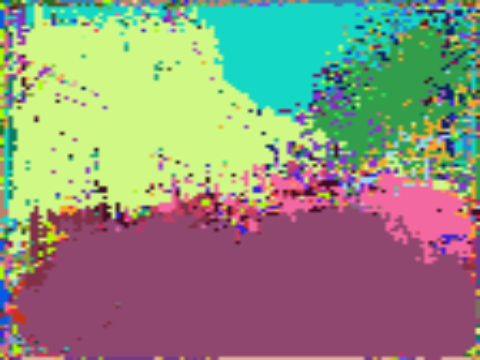

In [ ]:
# Printing Semantic Mask

from IPython.display import Image
Image('/tmp/out.png')

In [ ]:
o = model.predict_segmentation(
    inp="images_prepped_test/0016E5_07965.png",
    out_fname="/tmp/out.png" , overlay_img=True, show_legends=True,
    class_names = [ "Sky",    "Building", "Pole","Road","Pavement","Tree","SignSymbol", "Fence", "Car","Pedestrian", "Bicyclist"]

)

1/1 [==============================] - 0s 233ms/step


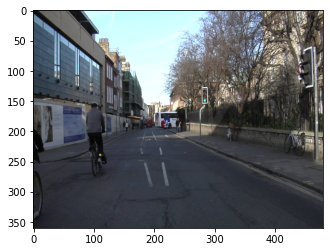

In [ ]:
# Printing Orignial Image

import matplotlib.pyplot as plt
inp= "images_prepped_test/0016E5_08139.png"
image = plt.imread(inp)
plt.imshow(image)

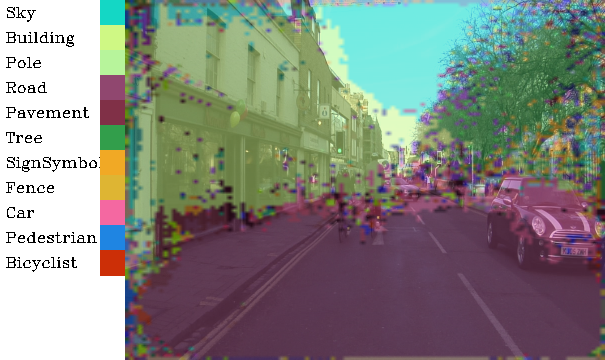

In [ ]:
# Printing Super Imposed Image of Semantic Segmentation

from IPython.display import Image
Image('/tmp/out.png')